In [1]:
import matplotlib.pyplot as plt
import numpy as np

import skdemo
import scipy.ndimage as nd

from skimage import data, color, io, morphology, filters, img_as_float, measure
from skimage.transform import hough_circle, hough_circle_peaks
from skimage.feature import canny
from skimage.draw import circle_perimeter
from skimage.util import img_as_ubyte
from skimage.segmentation import flood, flood_fill

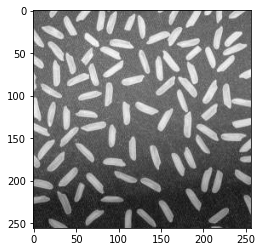

In [2]:
rice = io.imread('rice.jpg')
plt.imshow(rice, cmap='gray')
plt.show()

### Use Otsu's method

131


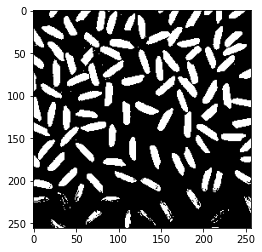

In [3]:
otsu_thresh = filters.threshold_otsu(rice)
print(otsu_thresh)

otsu_binary = rice > otsu_thresh
plt.imshow(otsu_binary, cmap='gray')
plt.show()

### Local threshold

[[120.05628366 120.15753326 120.36069716 ... 135.2105398  134.72296929
  134.47530517]
 [120.11126885 120.21218672 120.41467195 ... 135.07791934 134.59399919
  134.3481969 ]
 [120.22304451 120.32331357 120.52447158 ... 134.8178346  134.34109974
  134.09896203]
 ...
 [ 74.24912411  74.34069678  74.52580643 ...  74.11219937  74.15014141
   74.16962326]
 [ 74.23050248  74.32354252  74.51161891 ...  73.98401934  74.01946948
   74.03767214]
 [ 74.22184584  74.31561967  74.50517995 ...  73.92051971  73.95473894
   73.97230958]]


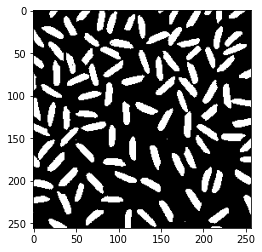

Number of grains 102


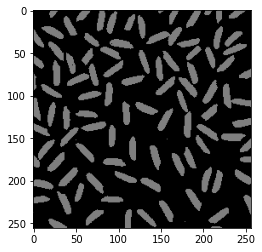

In [4]:
block_size = 55
local_thresh = filters.threshold_local(rice, block_size, offset=-20)
print(local_thresh)
local_binary = rice > local_thresh
plt.imshow(local_binary, cmap='gray')
plt.show()

local_image = local_binary.copy()
local_image = local_image.astype(np.uint8)
local_image[local_image == 1] = 255

grain_count = 0
rows, cols = local_image.shape

for i in range(rows):
    for j in range(cols):
        pixel = local_image[i, j]
        if pixel == 255:
            grain_count += 1
            flood_fill(local_image, (i, j), 127, in_place=True)

print("Number of grains", grain_count)
plt.imshow(local_image, cmap='gray', vmin=0, vmax=255)
plt.show()

### Contour

Number of grains 104


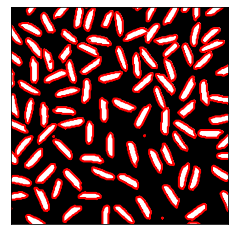

In [5]:
contour_image = local_binary.copy()
contour_image = contour_image.astype(float)

contours = measure.find_contours(contour_image, fully_connected='high')

fig, ax = plt.subplots()
ax.imshow(contour_image, cmap='gray')

for contour in contours:
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2, color='red')

print("Number of grains", len(contours))

ax.axis('image')
ax.set_xticks([])
ax.set_yticks([])
plt.show()

### Morphology

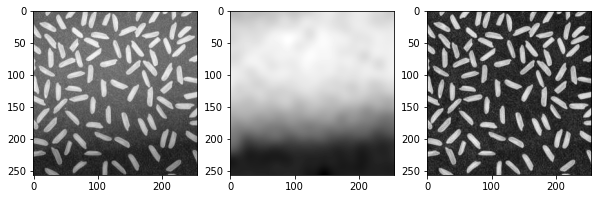

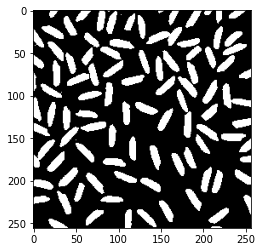

In [6]:
img = img_as_float(rice)
bg = morphology.erosion(img, morphology.square(15))
bg = filters.gaussian(bg, sigma=7)
result = img - bg

plt.figure(figsize=(10,8))
plt.subplot(1, 3, 1)
plt.imshow(img, cmap="gray")
plt.subplot(1, 3, 2)
plt.imshow(bg, cmap="gray")
plt.subplot(1, 3, 3)
plt.imshow(result, cmap="gray")
plt.show()

front = result > 0.2
plt.imshow(front, cmap="gray")
plt.show()

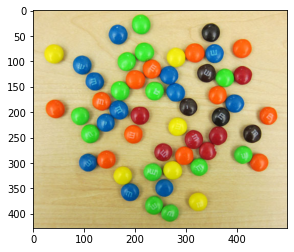

In [7]:
mm = io.imread('mm.jpg')
plt.imshow(mm)
plt.show()

### Find circle

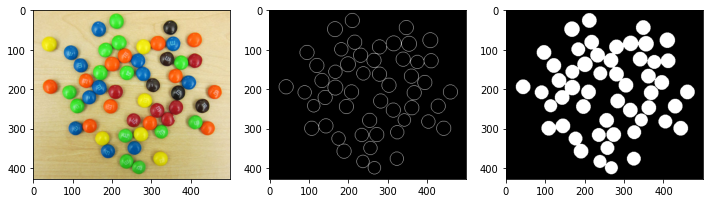

In [8]:
mm_gray = color.rgb2gray(mm)
edges = canny(mm_gray)
hough_radii = np.arange(15, 20)
hough_res = hough_circle(edges, hough_radii)
accums, cx, cy, radii = hough_circle_peaks(hough_res, hough_radii, 
                                           min_xdistance=15,
                                           min_ydistance=15,
                                           threshold=0.44)

fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(12, 6))

image = mm.copy()
blank = np.zeros((mm.shape)).astype(np.uint8)
# print(len(radii))
for center_y, center_x, radius in zip(cy, cx, radii):
    circy, circx = circle_perimeter(center_y, center_x, radius, shape=mm.shape)
    blank[circy, circx] = (255, 255, 255)
    
filled_mm = nd.morphology.binary_fill_holes(blank[:, :, 0]).astype(int)

ax[0].imshow(mm)
ax[1].imshow(blank[:, :, 0], cmap=plt.cm.gray)
ax[2].imshow(filled_mm, cmap=plt.cm.gray)
plt.show()

### Color space conversion

(<AxesSubplot:>, <AxesSubplot:xlabel='intensity', ylabel='# pixels'>)

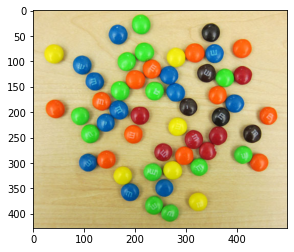

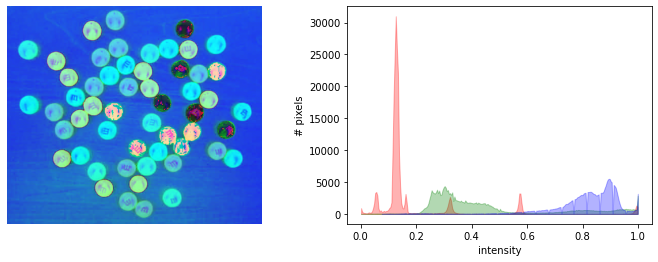

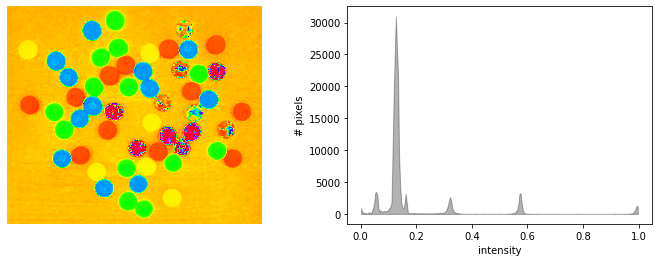

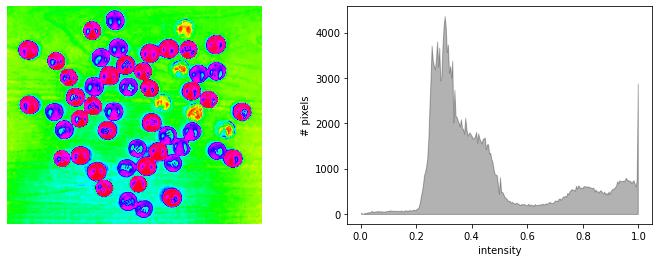

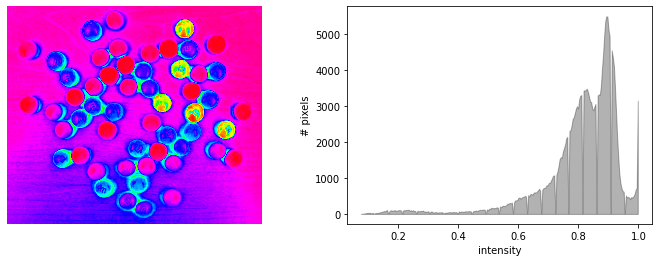

In [23]:
width = mm.shape[1]
height = mm.shape[0]
img = np.zeros((height,width))

mm_hsv = color.rgb2hsv(mm)

mm_hue = mm_hsv[:, :, 0]
mm_sat = mm_hsv[:, :, 1]
mm_val = mm_hsv[:, :, 2]

plt.imshow(mm)
skdemo.imshow_with_histogram(mm_hsv, cmap='hsv')
skdemo.imshow_with_histogram(mm_hue, cmap='hsv')
skdemo.imshow_with_histogram(mm_sat, cmap='hsv')
skdemo.imshow_with_histogram(mm_val, cmap='hsv')

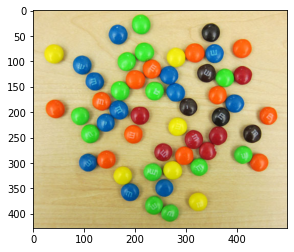

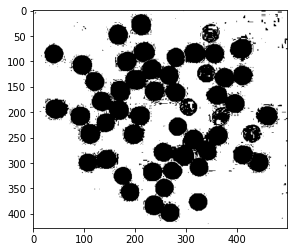

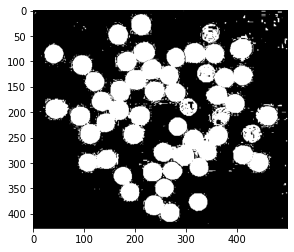

In [44]:
img = (mm_hue > 0.112) & (mm_hue < 0.15) # background
img_com = 1.0 - img # complementary

plt.imshow(mm)
plt.show()
plt.imshow(img, cmap=plt.cm.gray)
plt.show()
plt.imshow(img_com, cmap=plt.cm.gray)
plt.show()

0.3280933057598039


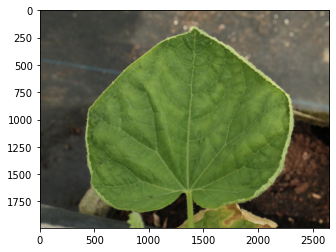

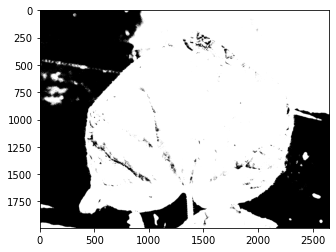

In [11]:
leaf = io.imread('leaf.jpg')
leaf_gray = io.imread('leaf.jpg', as_gray=True)
otsu_thresh = filters.threshold_otsu(leaf_gray)
print(otsu_thresh)
otsu_binary = leaf_gray > otsu_thresh

plt.imshow(leaf)
plt.show()
plt.imshow(otsu_binary, cmap='gray')
plt.show()

[[0.24454392 0.24062235 0.24846549 ... 0.42091725 0.42483882 0.42091725]
 [0.24846549 0.24846549 0.24062235 ... 0.42876039 0.42876039 0.41699569]
 [0.24062235 0.23670078 0.24062235 ... 0.42876039 0.42876039 0.41699569]
 ...
 [0.66543843 0.64975216 0.67328157 ... 0.05738706 0.05738706 0.05346549]
 [0.65367373 0.64190902 0.66348902 ... 0.04676118 0.04676118 0.04676118]
 [0.64836824 0.64444667 0.64836824 ... 0.04283961 0.04676118 0.05460431]]
[[0.24698389 0.24698399 0.2469842  ... 0.4419164  0.44191663 0.44191675]
 [0.24698453 0.24698463 0.24698484 ... 0.44191689 0.44191712 0.44191724]
 [0.24698581 0.24698591 0.24698612 ... 0.44191787 0.4419181  0.44191822]
 ...
 [0.31841524 0.31841218 0.31840608 ... 0.12915968 0.12916161 0.12916257]
 [0.31842539 0.31842234 0.31841624 ... 0.12915685 0.12915878 0.12915974]
 [0.31843047 0.31842742 0.31842132 ... 0.12915544 0.12915736 0.12915833]]


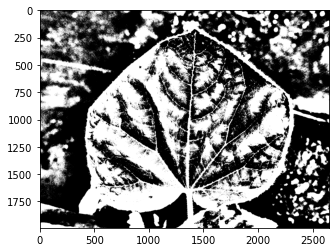

In [12]:
block_size = 777
local_thresh = filters.threshold_local(leaf_gray, block_size)
print(leaf_gray)
print(local_thresh)
local_binary = leaf_gray > local_thresh
plt.imshow(local_binary, cmap='gray')
plt.show()

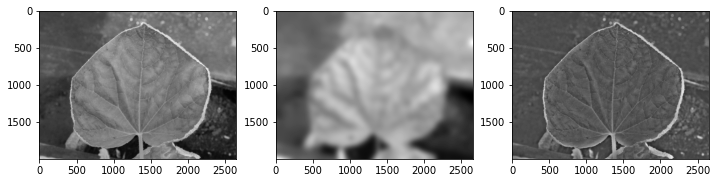

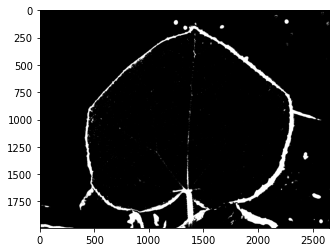

In [13]:
img = img_as_float(leaf_gray)
bg = morphology.erosion(img, morphology.square(31))
bg = filters.gaussian(bg, sigma=37)
result = img - bg

plt.figure(figsize=(12,8))
plt.subplot(1, 3, 1)
plt.imshow(img, cmap="gray")
plt.subplot(1, 3, 2)
plt.imshow(bg, cmap="gray")
plt.subplot(1, 3, 3)
plt.imshow(result, cmap="gray")
plt.show()

front = result > 0.2
plt.imshow(front, cmap="gray")
plt.show()

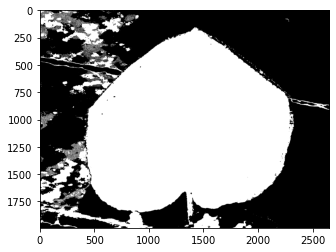

In [14]:
width = leaf_gray.shape[1]
height = leaf_gray.shape[0]
img = np.zeros((height,width))

leaf_hsv = color.rgb2hsv(leaf)
img[np.logical_and(leaf_hsv[:, :, 0]>0.2, leaf_hsv[:, :, 0]<0.35)] = 255

plt.imshow(img, cmap=plt.cm.gray)
plt.show()